In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
import pandas as pd

# Lire les premières lignes pour inspecter la structure
with open(file_path, 'r') as file:
    for _ in range(20):
        print(file.readline())

# Lire le fichier en ignorant les lignes mal formées
commits_data = pd.read_csv(file_path, on_bad_lines='skip')

# Afficher les premières lignes du DataFrame
print(commits_data.head())


NameError: name 'file_path' is not defined

In [11]:
# Vérifier les types de données et les valeurs manquantes
print("\nInformations sur les types de données et les valeurs manquantes:")
print(commits_data.info())


Informations sur les types de données et les valeurs manquantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Commit Hash  3790 non-null   object
 1   Author       3790 non-null   object
 2   Date         3790 non-null   object
 3   Message      3790 non-null   object
dtypes: object(4)
memory usage: 118.6+ KB
None


In [12]:
# Afficher les statistiques descriptives de base
print("\nStatistiques descriptives:")
print(commits_data.describe(include='all'))


Statistiques descriptives:
                                     Commit Hash          Author        Date  \
count                                       3790            3790        3790   
unique                                      3790             562         901   
top     637246baf96f07b19b193ed101f34b65cb35cffb  Quentin Lhoest  2020-12-09   
freq                                           1             922          47   

                 Message  
count               3790  
unique              3680  
top     Update README.md  
freq                  32  


In [13]:

# Afficher les premières lignes du dataset
print("Premières lignes du dataset avant nettoyage:")
print(commits_data.head())




Premières lignes du dataset avant nettoyage:
                                Commit Hash                      Author  \
0  637246baf96f07b19b193ed101f34b65cb35cffb                    Yu Zhang   
1  1e1d31387aa594b2e745c8ed8964962c134d203d              Quentin Lhoest   
2  bfb0a414d68e945addf95a9419a8314c372e19ba              Quentin Lhoest   
3  186b560eb2393c7d1913f4b3e76e9e04a081e09b  Albert Villanova del Moral   
4  c5464b32ce03739431235c13f314732201abcfac              Quentin Lhoest   

         Date                                            Message  
0  2024-06-26  Fix incorrect rank value in data splitting (#6...  
1  2024-06-25                     minor fix for bfloat16 (#7003)  
2  2024-06-25          Fix dump of bfloat16 torch tensor (#7002)  
3  2024-06-25  Fix tests using hf-internal-testing/librispeec...  
4  2024-06-24  Improve skip take shuffling and distributed (#...  


In [14]:
# 1. Gestion des données manquantes
# Vérifiez si des valeurs sont manquantes
missing_values = commits_data.isnull().sum()
print("\nValeurs manquantes dans chaque colonne:")
print(missing_values)




Valeurs manquantes dans chaque colonne:
Commit Hash    0
Author         0
Date           0
Message        0
dtype: int64


In [15]:
# Puisqu'il n'y a pas de valeurs manquantes, aucune imputation ou suppression n'est nécessaire

# 2. Identification et correction des erreurs de données
# Vérifiez les dates pour voir si elles sont dans un format cohérent
print("\nVérification des dates:")
print(commits_data['Date'].head())




Vérification des dates:
0    2024-06-26
1    2024-06-25
2    2024-06-25
3    2024-06-25
4    2024-06-24
Name: Date, dtype: object


In [26]:
# Convertir la colonne 'Date' en datetime pour la cohérence
commits_data['Date'] = pd.to_datetime(commits_data['Date'], errors='coerce')



In [17]:
# Vérifiez les dates non convertibles
invalid_dates = commits_data[commits_data['Date'].isnull()]
print("\nLignes avec des dates invalides:")
print(invalid_dates)




Lignes avec des dates invalides:
Empty DataFrame
Columns: [Commit Hash, Author, Date, Message]
Index: []


In [18]:
# Supprimez les lignes avec des dates invalides
commits_data = commits_data.dropna(subset=['Date'])



In [19]:
# Vérifiez et supprimez les duplicatas
commits_data = commits_data.drop_duplicates()



In [20]:
# Afficher les premières lignes après nettoyage
print("\nPremières lignes après nettoyage:")
print(commits_data.head())




Premières lignes après nettoyage:
                                Commit Hash                      Author  \
0  637246baf96f07b19b193ed101f34b65cb35cffb                    Yu Zhang   
1  1e1d31387aa594b2e745c8ed8964962c134d203d              Quentin Lhoest   
2  bfb0a414d68e945addf95a9419a8314c372e19ba              Quentin Lhoest   
3  186b560eb2393c7d1913f4b3e76e9e04a081e09b  Albert Villanova del Moral   
4  c5464b32ce03739431235c13f314732201abcfac              Quentin Lhoest   

        Date                                            Message  
0 2024-06-26  Fix incorrect rank value in data splitting (#6...  
1 2024-06-25                     minor fix for bfloat16 (#7003)  
2 2024-06-25          Fix dump of bfloat16 torch tensor (#7002)  
3 2024-06-25  Fix tests using hf-internal-testing/librispeec...  
4 2024-06-24  Improve skip take shuffling and distributed (#...  


In [21]:
# Vérifiez à nouveau les types de données
print("\nInformations sur les types de données après nettoyage:")
print(commits_data.info())


Informations sur les types de données après nettoyage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Commit Hash  3790 non-null   object        
 1   Author       3790 non-null   object        
 2   Date         3790 non-null   datetime64[ns]
 3   Message      3790 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 118.6+ KB
None


In [22]:
# Extraire l'année, le mois, et le jour de la colonne 'Date'
commits_data['Year'] = commits_data['Date'].dt.year
commits_data['Month'] = commits_data['Date'].dt.month
commits_data['Day'] = commits_data['Date'].dt.day

# Afficher les premières lignes après normalisation
print("\nPremières lignes après normalisation:")
print(commits_data.head())



Premières lignes après normalisation:
                                Commit Hash                      Author  \
0  637246baf96f07b19b193ed101f34b65cb35cffb                    Yu Zhang   
1  1e1d31387aa594b2e745c8ed8964962c134d203d              Quentin Lhoest   
2  bfb0a414d68e945addf95a9419a8314c372e19ba              Quentin Lhoest   
3  186b560eb2393c7d1913f4b3e76e9e04a081e09b  Albert Villanova del Moral   
4  c5464b32ce03739431235c13f314732201abcfac              Quentin Lhoest   

        Date                                            Message  Year  Month  \
0 2024-06-26  Fix incorrect rank value in data splitting (#6...  2024      6   
1 2024-06-25                     minor fix for bfloat16 (#7003)  2024      6   
2 2024-06-25          Fix dump of bfloat16 torch tensor (#7002)  2024      6   
3 2024-06-25  Fix tests using hf-internal-testing/librispeec...  2024      6   
4 2024-06-24  Improve skip take shuffling and distributed (#...  2024      6   

   Day  
0   26  
1   25  
2 

C:\Users\HP\AppData\Local\Temp\ipykernel_16032\1262495757.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=commits_data, palette='viridis')


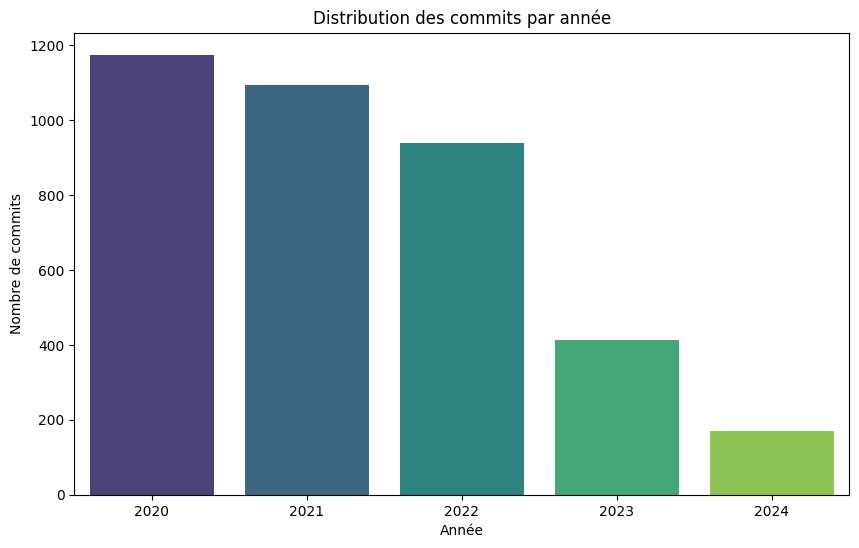

C:\Users\HP\AppData\Local\Temp\ipykernel_16032\1262495757.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')


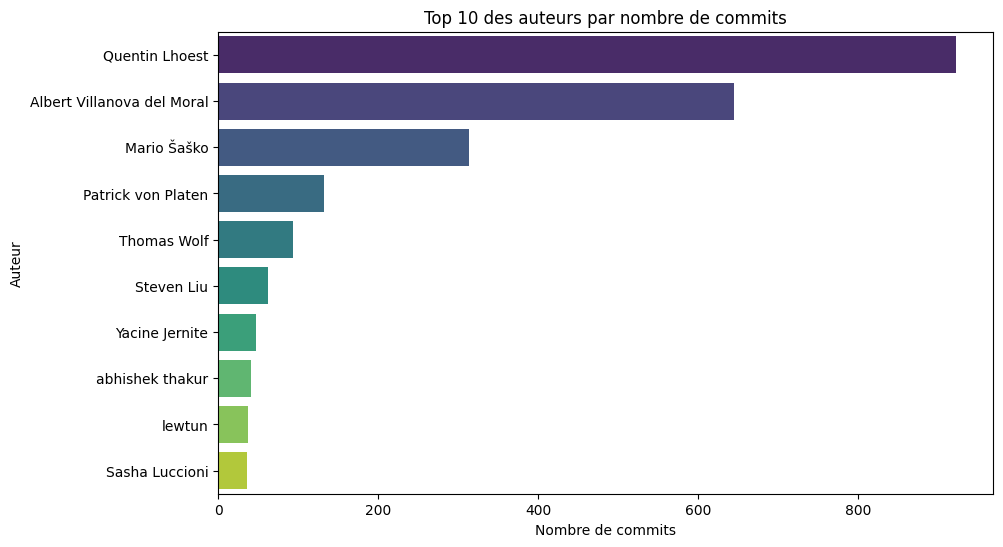

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la distribution des commits par année
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=commits_data, palette='viridis')
plt.title('Distribution des commits par année')
plt.xlabel('Année')
plt.ylabel('Nombre de commits')
plt.show()

# Visualisation de la distribution des commits par auteur
plt.figure(figsize=(10, 6))
top_authors = commits_data['Author'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 des auteurs par nombre de commits')
plt.xlabel('Nombre de commits')
plt.ylabel('Auteur')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_16032\1262495757.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=commits_data, palette='viridis')


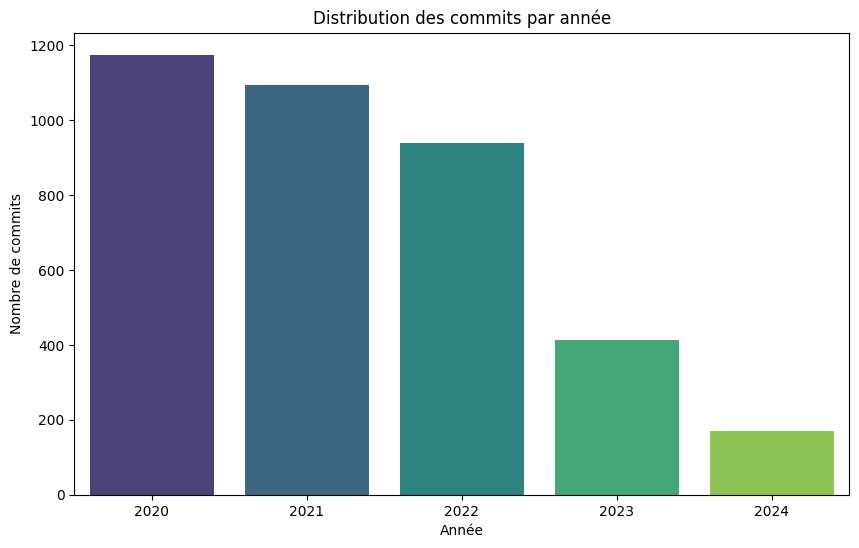

C:\Users\HP\AppData\Local\Temp\ipykernel_16032\1262495757.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')


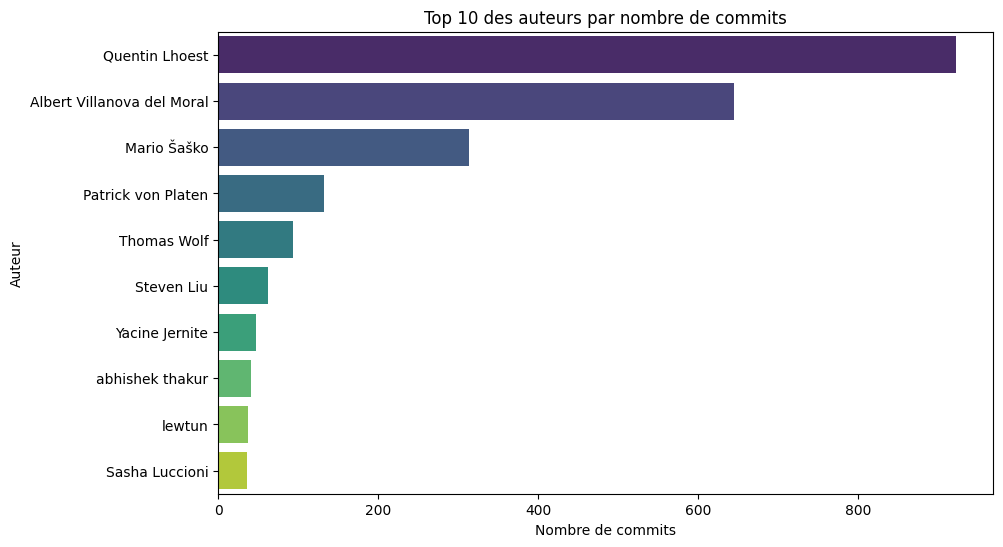

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la distribution des commits par année
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=commits_data, palette='viridis')
plt.title('Distribution des commits par année')
plt.xlabel('Année')
plt.ylabel('Nombre de commits')
plt.show()

# Visualisation de la distribution des commits par auteur
plt.figure(figsize=(10, 6))
top_authors = commits_data['Author'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 des auteurs par nombre de commits')
plt.xlabel('Nombre de commits')
plt.ylabel('Auteur')
plt.show()


                                Commit Hash                      Author  \
0  637246baf96f07b19b193ed101f34b65cb35cffb                    Yu Zhang   
1  1e1d31387aa594b2e745c8ed8964962c134d203d              Quentin Lhoest   
2  bfb0a414d68e945addf95a9419a8314c372e19ba              Quentin Lhoest   
3  186b560eb2393c7d1913f4b3e76e9e04a081e09b  Albert Villanova del Moral   
4  c5464b32ce03739431235c13f314732201abcfac              Quentin Lhoest   

        Date                                            Message  Year  Month  \
0 2024-06-26  Fix incorrect rank value in data splitting (#6...  2024      6   
1 2024-06-25                     minor fix for bfloat16 (#7003)  2024      6   
2 2024-06-25          Fix dump of bfloat16 torch tensor (#7002)  2024      6   
3 2024-06-25  Fix tests using hf-internal-testing/librispeec...  2024      6   
4 2024-06-24  Improve skip take shuffling and distributed (#...  2024      6   

   Day  
0   26  
1   25  
2   25  
3   25  
4   24  
<class 'pandas

C:\Users\HP\AppData\Local\Temp\ipykernel_16032\3766381680.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=commits_data, palette='viridis')


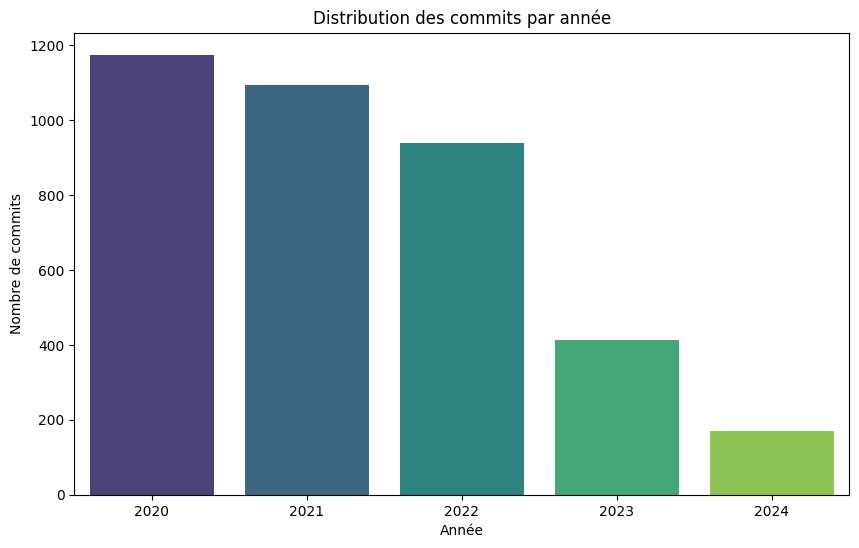

In [25]:
# Cellule de texte
# ## Exploration initiale des données
# Afficher les premières lignes du dataset pour comprendre sa structure.
# Vérifier les types de données et les valeurs manquantes.

# Cellule de code
print(commits_data.head())
print(commits_data.info())

# Cellule de texte
# ## Nettoyage des données
# Gérer les données manquantes et identifier les erreurs de données.

# Cellule de code
missing_values = commits_data.isnull().sum()
print(missing_values)
commits_data['Date'] = pd.to_datetime(commits_data['Date'], errors='coerce')
invalid_dates = commits_data[commits_data['Date'].isnull()]
print(invalid_dates)
commits_data = commits_data.dropna(subset=['Date'])
commits_data = commits_data.drop_duplicates()
print(commits_data.head())

# Cellule de texte
# ## Normalisation des données
# Extraire l'année, le mois, et le jour de la colonne 'Date' pour la normalisation.

# Cellule de code
commits_data['Year'] = commits_data['Date'].dt.year
commits_data['Month'] = commits_data['Date'].dt.month
commits_data['Day'] = commits_data['Date'].dt.day
print(commits_data.head())

# Cellule de texte
# ## Visualisation des données
# Créer des visualisations significatives pour explorer les distributions et les corrélations.

# Cellule de code
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=commits_data, palette='viridis')
plt.title('Distribution des commits par année')
plt.xlabel('Année')
plt.ylabel('Nombre de commits')
plt.show()
